# EDA Analysis 

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [15,8]

In [61]:
df = pd.read_csv('car.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [62]:
df.shape

(8128, 13)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [64]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [65]:
df.name.unique()
# cannot make it categorical as all rows has unique values

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [66]:
df.year.unique()
# depends weather to convert ii into categorical or not

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2003, 2019, 2008, 2020, 1999, 2000, 1983,
       2004, 1996, 1994, 1995, 1998, 1997, 1991], dtype=int64)

In [67]:
df.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [68]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [69]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [70]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [71]:
df.mileage = df.mileage.str.split(expand=True)[0]
# converted into number and later on will convert it into float

In [72]:
df.engine = df.engine.str.split(expand = True)[0]
# converted into number and later on will convert it into integer

In [73]:
df.max_power = df.max_power.str.split(expand = True)[0]
# converted into number and later on will convert it into float

In [74]:
torque_1 = df.torque.str.split(expand = True)[0]

In [103]:
df['Torque_1'] = torque_1.replace({'N':'','n':'','M':'','m':'','@':'','Kg':''}, regex = True)

In [122]:
df.Torque_1 = df.Torque_1.replace({'Kg':'','(11.2)':'','(38.7Kg)':''}, regex = True)

In [78]:
df.drop('torque', axis = 1, inplace =True)

In [99]:
df.max_power = df.max_power.replace({'bhp':'NaN','':'NaN'}, regex = True)

In [82]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Torque_1
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0,190
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0,12.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0,22.4
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0,11.5


In [81]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
Torque_1         222
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
 12  Torque_1       7906 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [85]:
df.mileage = df.mileage.astype('float')

In [87]:
df.engine = df.engine.astype('float')

In [100]:
df.max_power = df.max_power.astype('float')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  seats          7907 non-null   float64
 12  Torque_1       7906 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 825.6+ KB


In [134]:
df.isnull().sum()[df.isnull().sum()!=0]

mileage      221
engine       221
max_power    216
seats        221
Torque_1     222
dtype: int64

In [135]:
df.mileage.describe()

count    7907.000000
mean       19.418783
std         4.037145
min         0.000000
25%        16.780000
50%        19.300000
75%        22.320000
max        42.000000
Name: mileage, dtype: float64

In [136]:
df.mileage.fillna(df.mileage.median(), inplace = True)

In [138]:
df.engine.dscribe()

count    7907.000000
mean     1458.625016
std       503.916303
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1582.000000
max      3604.000000
Name: engine, dtype: float64

<AxesSubplot:>

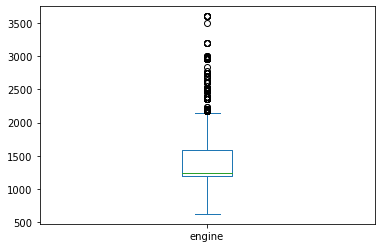

In [140]:
df.engine.plot(kind = 'box')

In [141]:
df.engine.fillna(df.engine.median(), inplace = True)

In [142]:
df.max_power.describe()

count    7912.000000
mean       91.517919
std        35.822499
min         0.000000
25%        68.050000
50%        82.000000
75%       102.000000
max       400.000000
Name: max_power, dtype: float64

<AxesSubplot:>

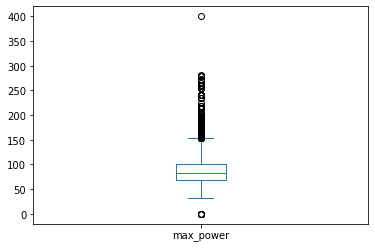

In [143]:
df.max_power.plot(kind = 'box')

In [144]:
df.max_power.fillna(df.max_power.median(), inplace = True)

In [146]:
df.seats.describe()

count    7907.000000
mean        5.416719
std         0.959588
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        14.000000
Name: seats, dtype: float64

In [147]:
df.seats.fillna(df.seats.median(), inplace = True)

In [151]:
df.Torque_1.describe()

count     7906
unique     248
top        200
freq       693
Name: Torque_1, dtype: object

In [154]:
df.Torque_1.fillna(df.Torque_1.mode(), inplace = True)

In [155]:
df.isnull().sum()[df.isnull().sum()!=0]

Torque_1    222
dtype: int64

# Univariate Analaysis

In [157]:
num = df.select_dtypes(include = np.number)

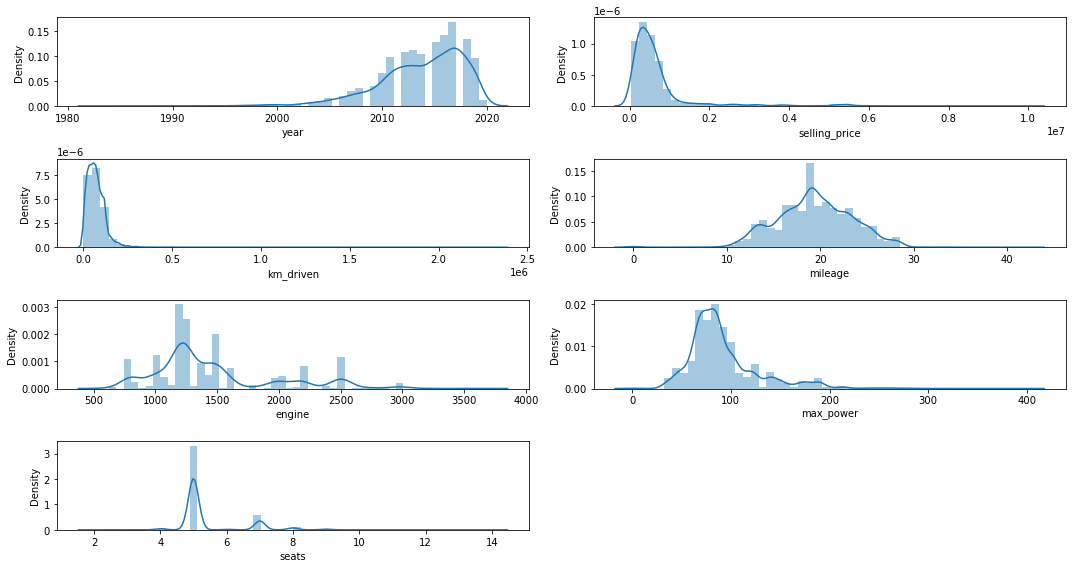

In [161]:
a = 4
b = 2
c = 1

for i in num:
    plt.subplot(a,b,c)
    sns.distplot(df.loc[:,i])
    c = c + 1
    
plt.tight_layout()
plt.show()

### Inference
* Between 2010 and 2020 has the maximum density compared to other years.
* km_driven is concentrated more between 0 to 0.3
* mileage is following normal distribution

In [167]:
cat = df.select_dtypes(include = np.object).columns
cat

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'Torque_1'], dtype='object')

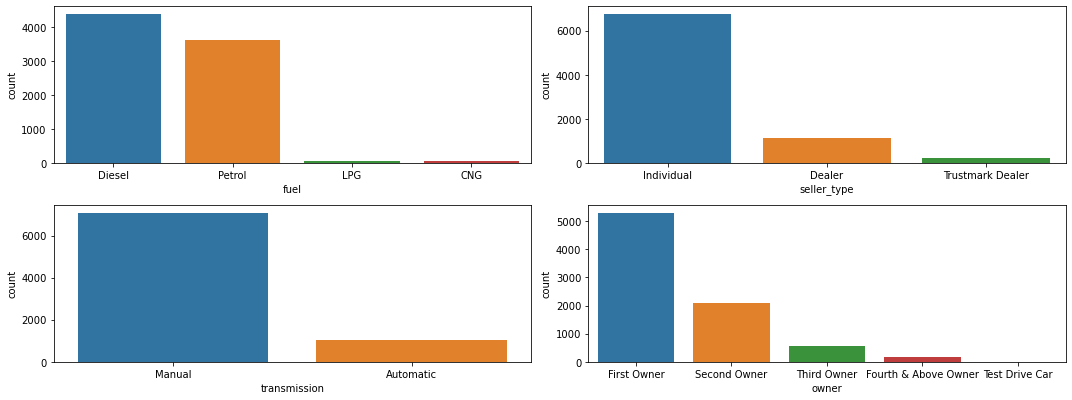

In [169]:
cat = ['fuel', 'seller_type', 'transmission', 'owner']

a = 3
b = 2
c = 1

for i in cat:
    plt.subplot(a,b,c)
    sns.countplot(df.loc[:,i])
    c = c + 1
    
plt.tight_layout()
plt.show()

### Inference
* In fuel column Diesel cars are more compared to other categories
* First owner is more compared to other category
* Individual seller_type is more compared to other categories
* Manual Transmission is more compared to automatic

# Bivariate Analysis wrt selling price

<AxesSubplot:xlabel='selling_price', ylabel='km_driven'>

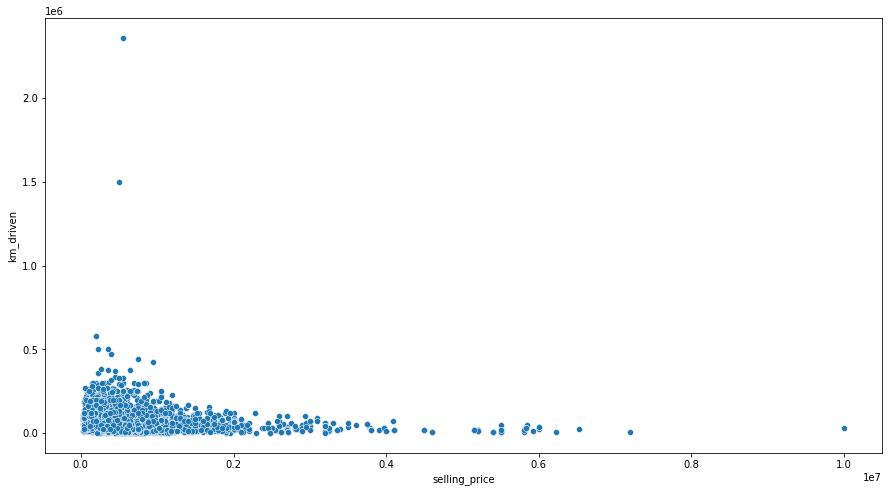

In [172]:
sns.scatterplot(df['selling_price'], df['km_driven'])
# No such clear pattern can be seen but majority of the data lies between 0 to 0.2

<AxesSubplot:xlabel='selling_price', ylabel='mileage'>

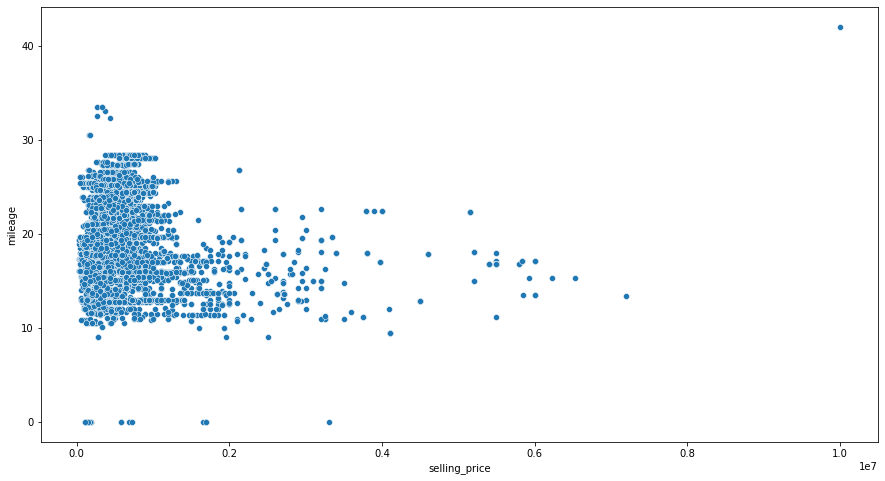

In [173]:
sns.scatterplot(df['selling_price'], df['mileage'])
# No such pattern can be seen

<AxesSubplot:xlabel='selling_price', ylabel='engine'>

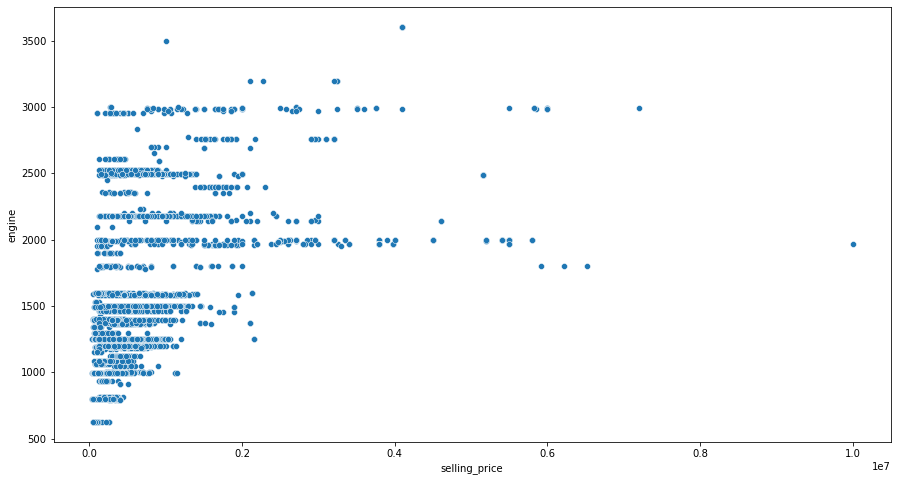

In [174]:
sns.scatterplot(df['selling_price'], df['engine'])
# selling price is more for 2000 to 3000 engine

<AxesSubplot:xlabel='selling_price', ylabel='max_power'>

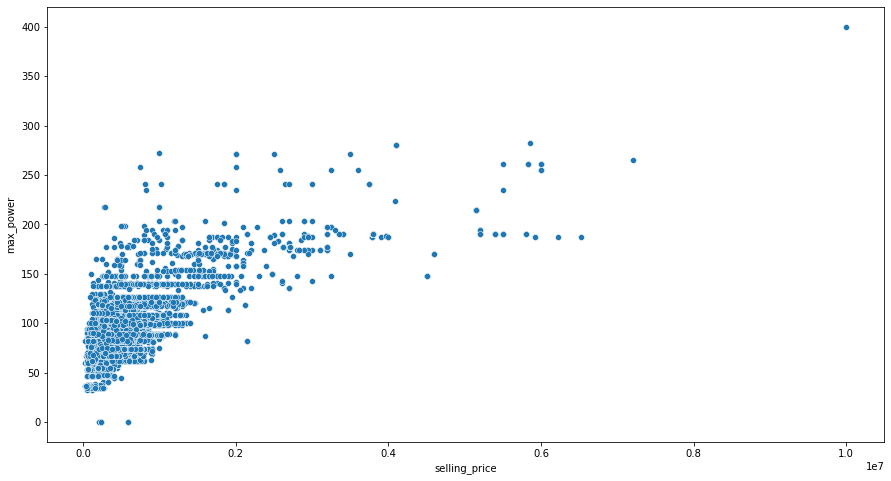

In [175]:
sns.scatterplot(df['selling_price'], df['max_power'])
# selling price is more for max power between 150 and 200

<AxesSubplot:xlabel='selling_price', ylabel='seats'>

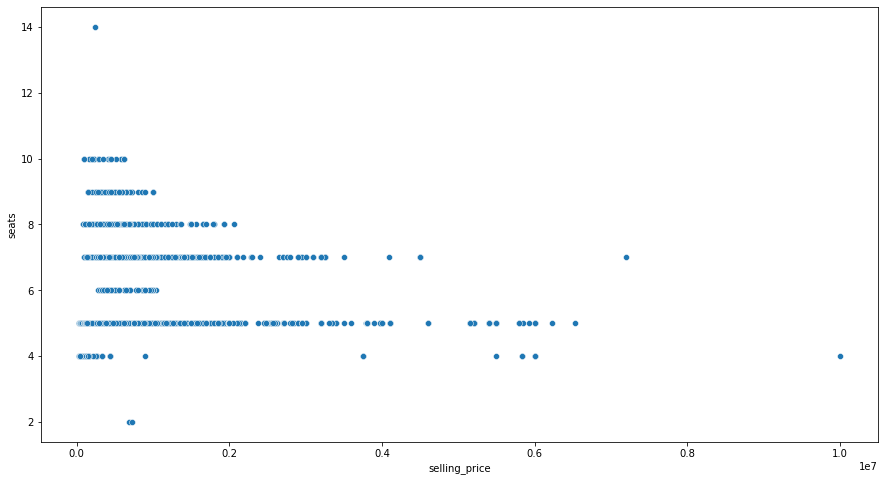

In [176]:
sns.scatterplot(df['selling_price'], df['seats'])
# selling price is high for seats between 4 to 8